In [1]:
%matplotlib inline

#Why inline vs. notebook

import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import uszipcode
import numpy as numpy
import time
import requests
import json
import warnings
warnings.filterwarnings('ignore')

#Need to document that we filetered out alcohol from the full data set

In [2]:
#IMPORT DATA from CDC for Alcohol

CDIA_df = pd.read_csv("data/U.S._Chronic_Disease_Indicators__Alcohol.csv",\
                      header=0, thousands=r',', dtype={'DataValueAlt': numpy.float64})
#CDIA_df.head()

In [3]:
#Create Binge by State Data Set


# mean of the BingeDrinking Data by state and year
binge_df = CDIA_df.loc[  (CDIA_df['QuestionID'] =='ALC2_2') 
& (CDIA_df['DataValueType'] =='Age-adjusted Prevalence')
& (CDIA_df['DataSource'] =='BRFSS')                       
& (CDIA_df['Stratification1'] =='Overall')].groupby(['LocationDesc','YearStart'])['DataValueAlt'].mean()
binge_df1 = binge_df.unstack(1)

#binge_df1

In [4]:
###Temp turned off


########        BINGE by STATE_2011_2016     #######################
#plot graph of binge drinking for all states by year and value
#binge_df1.drop('United States').T.plot(kind='line', legend='reverse', ylim=(0,30), figsize=(15,15))

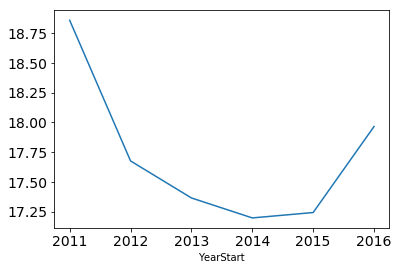

In [5]:
# ########        BINGEING FROM 2011_2016     #######################
binge_df2 = binge_df.drop('United States').groupby(['YearStart']).mean()
#binge_df2

binge_plot = binge_df2.plot(kind='line', y = 'YearStart',  
  legend = False, fontsize=14)
binge_plot

In [6]:
#######   HEAVY_STATE_2011_2016
#mean of the Heavy drinking by state and year
heavy_df = CDIA_df.loc[  (CDIA_df['QuestionID'] =='ALC5_1') 
& (CDIA_df['DataValueType'] =='Age-adjusted Prevalence')                       
& (CDIA_df['Stratification1'] =='Overall')].groupby(['LocationDesc','YearStart'])['DataValueAlt'].mean()
heavy_df1 = heavy_df.unstack(1)
# heavy_df1 



In [7]:
###Temp turned off
##Too many variables - idea is to group

#plot graph of heavy drinking for all states by year and value
###Temp turned off
# heavy_df1.drop('United States').T.plot(kind='line', legend='reverse', ylim=(0,12), figsize=(15,15))

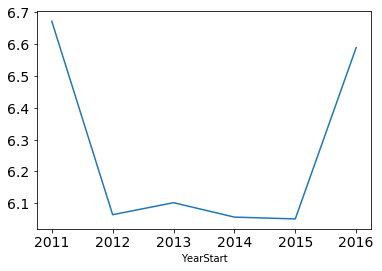

In [8]:
###  HEAVY_MEAN_2011_2016

heavy_df2 = heavy_df.drop('United States').groupby(['YearStart']).mean()
#heavy_df2

heavy_plot = heavy_df2.plot(kind='line', y = 'YearStart', legend = False, fontsize=14,)
heavy_plot

In [9]:
###   Temp Turn Off
###Note: I think using two individual line charts over this chart.

#Binge Vs. Heavy Drinking Metrics
#a1_df = pd.concat([binge_df2, heavy_df2], axis=1)
#a1_df.columns = ['Binge', 'Heavy']
#a1_df.plot(kind='line')

In [10]:
#a1_df = pd.concat([binge_df2, heavy_df2], axis=1)
#a1_df.columns = ['Binge', 'Heavy']
#a1_df.plot(kind='bar')
# CDIA_df.columns

In [11]:
####CMT attempt to do with Gender


###Filter CDIA data for Age-Adjusted Rate
cldm_rev_df = CDIA_df.loc[(CDIA_df['QuestionID'] =='ALC6_0') 
& (CDIA_df['DataSource'] =='NVSS')
& (CDIA_df['DataValueType'] =='Age-adjusted Rate')
& (CDIA_df['Stratification1'] =='Overall')|(CDIA_df['Stratification1'] =='Male')|(CDIA_df['Stratification1'] =='Female')].groupby(['Stratification1','YearStart'])['DataValueAlt'].mean()


#|(CDIA_df['Stratification1'] =='Gender')
#Adjust Format so Year_Start are columns
cldm_df2 = cldm_rev_df.unstack(1)

cldm_df2


YearStart,2010,2011,2012,2013,2014,2015,2016
Stratification1,,,,,,,
Female,78.482000,26.886815,27.335395,27.963058,29.574957,6.531944,6.955963
Male,144.604575,47.985052,49.102735,51.015214,52.446325,10.550926,10.820000
Overall,9.309615,9.819231,10.040385,10.267308,10.482692,NaN,NaN


In [12]:
#heavy_plot_sex=cldm_df2.plot(kind='line', y = 'YearStart', legend = True, fontsize=14,)
#heavy_plot_sex

In [13]:
###Filter CDIA data for Age-Adjusted Rate
cldm_df = CDIA_df.loc[  (CDIA_df['QuestionID'] =='ALC6_0') 
& (CDIA_df['DataSource'] =='NVSS')
& (CDIA_df['DataValueType'] =='Age-adjusted Rate')
& (CDIA_df['Stratification1'] =='Overall')].groupby(['LocationDesc','YearStart'])['DataValueAlt'].mean()
cldm_df

LocationDesc   YearStart
Alabama        2010          9.4
               2011          9.9
               2012         11.0
               2013         10.1
               2014         11.8
Alaska         2010          9.8
               2011         13.0
               2012         12.6
               2013         11.3
               2014         10.7
Arizona        2010         12.7
               2011         13.5
               2012         13.9
               2013         14.7
               2014         14.3
Arkansas       2010          9.9
               2011          9.4
               2012          9.5
               2013          9.8
               2014         10.4
California     2010         11.3
               2011         11.7
               2012         11.7
               2013         11.8
               2014         12.0
Colorado       2010         11.2
               2011         12.3
               2012         11.7
               2013         12.6
               201

In [14]:
cldm_df1 = cldm_df.unstack(1)
cldm_df1

YearStart,2010,2011,2012,2013,2014
LocationDesc,,,,,
Alabama,9.4,9.9,11.0,10.1,11.8
Alaska,9.8,13.0,12.6,11.3,10.7
Arizona,12.7,13.5,13.9,14.7,14.3
Arkansas,9.9,9.4,9.5,9.8,10.4
California,11.3,11.7,11.7,11.8,12.0
Colorado,11.2,12.3,11.7,12.6,12.7
Connecticut,7.3,7.3,7.8,7.7,8.5
Delaware,8.8,8.6,7.0,7.2,9.3
District of Columbia,8.9,6.8,8.5,8.1,7.7


In [15]:
#plot graph of chronic liver disease mortality for all states by year and value

In [16]:
# Total mean of all states per year
cldm_df2 =cldm_df.drop('United States').groupby(['YearStart']).mean()
cldm_df2


YearStart
2010     9.307843
2011     9.821569
2012    10.043137
2013    10.268627
2014    10.484314
Name: DataValueAlt, dtype: float64

Text(0.5,1,'Chronic Liver Disease Mortality')

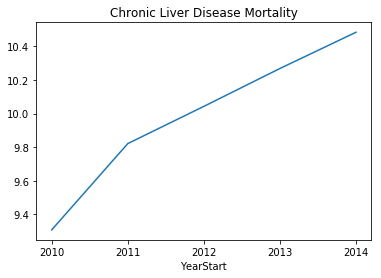

In [17]:
#Line Chart

cldm_df2.plot(kind='line', y = 'YearStart', legend = False, fontsize=10,use_index=True)
test=[2010,2011,2012,2013,2014]
plt.xticks(test)
plt.title ("Chronic Liver Disease Mortality")
#Need to change X-Axis to 2011-2016 (remove 2010)

In [18]:
question_breakdown_csv=("Question_breakdown_w_age_CMT.csv")
question_breakdown_data=pd.read_csv(question_breakdown_csv)
question_breakdown_data

,Question,Binge_Heavy,Description,Sex,Age,Question_additional_comments
0,Binge drinking prevalence among adults aged >=...,Binge,Prevalence,Adults,>=18,NaN
1,Binge drinking intensity among adults aged >= ...,Binge,intensity,Adults,>=18,who Binge drink
2,Binge drinking prevalence among women aged 18-...,Binge,Prevalence,Women,18-44,NaN
3,Binge drinking frequency among adults aged >= ...,Binge,frequency,Adults,>=18,who Binge drink
4,Heavy drinking among adults aged >= 18 years,Heavy,NaN,Adults,>=18,NaN
5,Heavy drinking among women aged 18-44 years,Heavy,NaN,Women,18-44,NaN
6,Alcohol use among youth,NaN,NaN,Youth,14 to 18,NaN
7,Binge drinking prevalence among youth,Binge,Prevalence,Youth,14 to 18,NaN
8,Per capita alcohol consumption among persons a...,NaN,NaN,NaN,14 to 18,NaN
9,Alcohol use before pregnancy,NaN,NaN,NaN,NaN,NaN


In [19]:
#merged_data_new_csv=("merged_data_edited.csv")
#merged_data_new=pd.read_csv(merged_data_new_csv)
#merged_data_new.head()

In [20]:
merged_data=pd.merge(CDIA_df,question_breakdown_data,on="Question")
#merged_data.dtypes

In [21]:
#Convert % into one column if DataValue = percent
dataVal_w_units=merged_data["DataValue"]+ " " + merged_data["DataValueUnit"]
merged_data['DataVal with Units']=dataVal_w_units
#merged_data_new.columns

In [22]:
merged_data["DataValueType"].unique()


array(['Crude Prevalence', 'Age-adjusted Prevalence', 'Mean',
       'Age-adjusted Mean', 'Number', 'Age-adjusted Rate', 'Crude Rate',
       'US Dollars',
       'Commercial host (dram shop) liability status for alcohol service',
       'Local control of the regulation of alcohol outlet density',
       'Per capita alcohol consumption'], dtype=object)

In [23]:
#Add sex_age category for Gender with Sex column
sex_adults=merged_data.loc[(merged_data["Sex"] == "Adults")\
                               & (merged_data["StratificationCategory1"] == "Gender")\
                               & (merged_data["LocationDesc"]== "United States")\
                               & (merged_data["DataValueType"]== "Age-adjusted Prevalence")
                               & (merged_data["Binge_Heavy"]== "Binge")
                               ,["YearStart","DataValue","Stratification1","Age","Sex","StratificationCategory1",\
                                 "LocationDesc","DataValueType"]]

#Sex_Age_Calc
sex_age=sex_adults["Stratification1"] + " "  + sex_adults["Age"]
sex_adults['sex_age']=sex_age
sex_adults_agesex=sex_adults[["YearStart","DataValue","sex_age"]]

#Add sex_age category for NOT Adultsfor reverse Concatenate 

sex_not_adults=merged_data.loc[(merged_data["Sex"] != "Adults")\
                                   &(merged_data["StratificationCategory1"] == "Overall")\
                                   & (merged_data["LocationDesc"]== "United States")\
                                   & (merged_data["DataValueType"]== "Age-adjusted Prevalence")\
                                   & (merged_data["Binge_Heavy"]== "Binge")
                                   ,:]

sex_not_adults_agesex=sex_not_adults[["YearStart","DataValue","Age","Sex"]]
sex_age=sex_not_adults["Sex"] + " "  +sex_not_adults["Age"]
sex_not_adults_agesex['sex_age']=sex_age
sex_not_adults_agesex=sex_not_adults_agesex[["YearStart","DataValue","sex_age"]]

#Merge Data
chart1_data_base=pd.merge(sex_adults_agesex,sex_not_adults_agesex, how="outer")
chart1_data_base["DataValue"]=chart1_data_base["DataValue"].astype(float)
chart1_data_base["YearStart"]=chart1_data_base["YearStart"].astype(int)

chart1_data_base

,YearStart,DataValue,sex_age
0,2016,22.5,Male >=18
1,2016,13.1,Female >=18
2,2015,12.6,Female >=18
3,2015,22.0,Male >=18
4,2012,12.1,Female >=18
5,2012,23.4,Male >=18
6,2011,13.6,Female >=18
7,2011,24.8,Male >=18
8,2014,11.8,Female >=18
9,2014,21.8,Male >=18


In [24]:
chart1_data_base=chart1_data_base.reset_index().pivot(columns='YearStart',index='sex_age',values='DataValue')

chart1_data_base

YearStart,2011,2012,2013,2014,2015,2016
sex_age,,,,,,
Female >=18,13.6,12.1,12.2,11.8,12.6,13.1
Male >=18,24.8,23.4,23.1,21.8,22.0,22.5


Text(0,0.5,'% Age-Adjusted Drinkers')

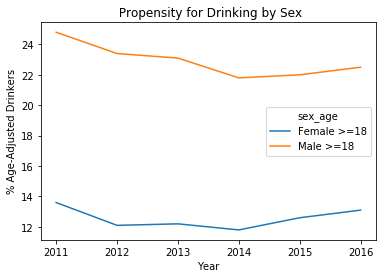

In [25]:
#CHART 1 line chart
chart1_data_base.T.plot(kind='line')
plt.title (" Propensity for Drinking by Sex")
plt.xlabel ("Year")
plt.ylabel ("% Age-Adjusted Drinkers")


In [26]:
chart2_data_Base=merged_data
#Sex_Age_Calc
sex_age=chart2_data_Base["Stratification1"] + " "  + chart2_data_Base["Age"]
chart2_data_Base['sex_age']=sex_age


#Add sex_age category for Gender with Sex column
chart2_data_base=chart2_data_Base.loc[(chart2_data_Base["Description"] == "intensity")\
                               & (chart2_data_Base["LocationDesc"]== "United States")\
                               & (chart2_data_Base["DataValueType"]== "Age-adjusted Mean")
                               ,["YearStart","DataValue","Stratification1","Age","Sex","StratificationCategory1",\
                                 "LocationDesc","DataValueType","sex_age"]]

chart2_data_base["DataValue"]=chart2_data_base["DataValue"].astype(float)
#intensity_drinking.dtypes

chart2_data_base_chart=chart2_data_base[["YearStart","DataValue","sex_age"]]
#chart2_data_base_chart

In [27]:
chart2_data_base_chart=chart2_data_base_chart.reset_index().pivot(columns='YearStart',index='sex_age',values='DataValue')
chart2_data_base_chart

YearStart,2011,2012,2013,2014,2015,2016
sex_age,,,,,,
Female >=18,5.4,5.4,5.4,5.4,5.3,5.3
Male >=18,8.3,8.2,8.2,8.1,8.1,8.2
Overall >=18,7.3,7.2,7.3,7.2,7.2,7.1


Text(0,0.5,'Age-Adjusted Mean')

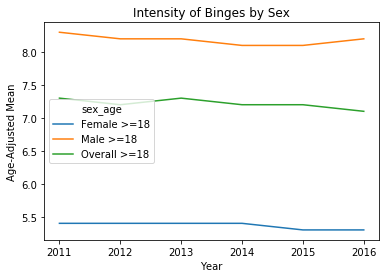

In [28]:
#CHART 2 line chart
chart2_data_base_chart.T.plot(kind='line')
plt.title ("Intensity of Binges by Sex")
plt.xlabel ("Year")
plt.ylabel ("Age-Adjusted Mean")

In [29]:
chart3_data_base=merged_data

#Sex_Age_Calc
sex_age=chart3_data_base["Stratification1"] + " "  + chart3_data_base["Age"]
chart3_data_base['sex_age']=sex_age


#Add sex_age category for Gender with Sex column
chart3_data_base=chart3_data_base.loc[(chart3_data_base["Description"] == "frequency")\
                               & (chart3_data_base["LocationDesc"]== "United States")\
                               & (chart3_data_base["DataValueType"]== "Age-adjusted Mean")
                               ,["YearStart","DataValue","Stratification1","Age","Sex","StratificationCategory1",\
                                 "LocationDesc","DataValueType","sex_age"]]


chart3_data_base["DataValue"]=chart3_data_base["DataValue"].astype(float)

chart3_data_base_chart=chart3_data_base[["YearStart","DataValue","sex_age"]]


In [30]:
chart3_data_base_chart=chart3_data_base_chart.reset_index().pivot(columns='YearStart',index='sex_age',values='DataValue')
chart3_data_base_chart

YearStart,2011,2012,2013,2014,2015,2016
sex_age,,,,,,
Female >=18,3.3,3.4,3.4,3.4,3.4,3.6
Male >=18,4.8,4.9,5.0,4.9,5.0,5.0
Overall >=18,4.4,4.4,4.5,4.5,4.5,4.7


Text(0,0.5,'Age-Adjusted Mean')

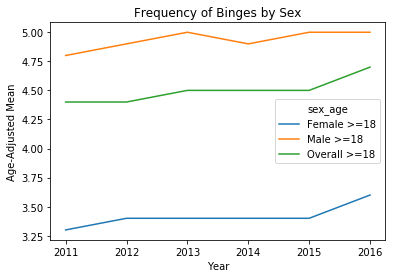

In [31]:
#CHART 3 line chart
chart3_data_base_chart.T.plot(kind='line')
plt.title ("Frequency of Binges by Sex")
plt.xlabel ("Year")
plt.ylabel ("Age-Adjusted Mean")

In [32]:
##### Ethnicity Prevalence Mean across United States by 2011-2016
###  LocationDesc= United States doesn't exist for these parameters so a mean must be used to derive it

Ethnicity_US_2011_2016_df= merged_data.loc[(merged_data['DataValueType'] =='Age-adjusted Prevalence')\
                                   & (merged_data['DataSource'] =='BRFSS')\
                                   & (merged_data['StratificationCategory1'] =='Race/Ethnicity')]\
                                   .groupby(['Stratification1','YearStart'])['DataValueAlt'].mean()

Ethnicity_US_2011_2016_df=Ethnicity_US_2011_2016_df.reset_index().pivot(columns='YearStart',index='Stratification1',values='DataValueAlt')
Ethnicity_US_2011_2016_df

YearStart,2011,2012,2013,2014,2015,2016
Stratification1,,,,,,
"Black, non-Hispanic",10.963934,9.930645,9.663158,9.567857,9.779661,10.758065
Hispanic,15.076812,13.445588,13.612121,13.138806,12.675410,12.330769
"Multiracial, non-Hispanic",17.275610,18.463415,15.272727,18.429730,17.662500,18.075000
"Other, non-Hispanic",13.022642,11.766102,11.415094,11.153333,11.768000,12.045614
"White, non-Hispanic",14.095192,13.208738,13.090385,12.875962,12.849515,13.971429


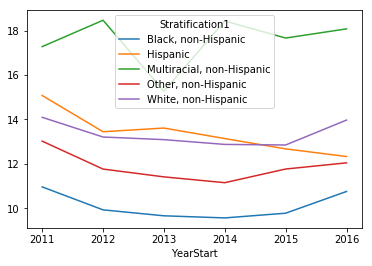

In [33]:
Ethnicity_US_2011_2016_df.T.plot(kind='line')

In [34]:
#import income by state data
filename = "data\median income by state 2017 dollars.csv"
income_data =  pd.read_csv(filename, header=0, thousands=r',', dtype={'2016 Median\nincome': numpy.float64})
income_data = income_data[income_data["State"]!="United States"]
income_2017 = income_data[["State", "2016 Median\nincome"]]
income_2017.columns = ["State", "Median Income 2016"]
income_2017.set_index("State")
income_2017.head()

FileNotFoundError: File b'data\\median income by state 2017 dollars.csv' does not exist

In [ ]:
print(binge_df1.columns)
binge_data = binge_df1.reset_index()
print(binge_data.columns)
binge_2016 = binge_data[["LocationDesc", 2016]]
binge_2016.columns = ["State", "2016 Rate"]
binge_2016
binge_by_income = pd.merge(income_2017, binge_2016)
binge_by_income.head()

In [ ]:
import numpy as np
#fig, ax = plt.subplots(nrows=2)

trend_x = np.array(binge_by_income["Median Income 2016"].tolist())
trend_y = binge_by_income["2016 Rate"].tolist()

# Set line
(slope, intercept, _, _, _) = linregress(trend_x, trend_y)
fit = slope * trend_x + intercept

In [ ]:
ax = binge_by_income.plot.scatter(x="Median Income 2016", y="2016 Rate")
plt.plot(trend_x, fit,"r--")
plt.show()

In [ ]:
filename = "data/people_per_bar_by_state.csv"
bar_data = pd.read_csv(filename, header=0, thousands=r',', dtype={'People Per Bar': numpy.float64})
bar_data.set_index("State")
bar_data.head()

In [ ]:
bar_and_rate_by_state = pd.merge(bar_data, binge_2016)
bar_and_rate_by_state.head()

In [ ]:
trend_x = np.array(bar_and_rate_by_state["People Per Bar"].tolist())
trend_y = bar_and_rate_by_state["2016 Rate"].tolist()

# Set line
(slope, intercept, _, _, _) = linregress(trend_x, trend_y)
fit = slope * trend_x + intercept

In [ ]:
ax = bar_and_rate_by_state.plot.scatter(x="People Per Bar", y="2016 Rate")
plt.plot(trend_x, fit,"r--")
plt.show()

In [ ]:
regulation_data = pd.DataFrame(CDIA_df.loc[(CDIA_df['QuestionID'] =='ALC10_0') 
& (CDIA_df['DataSource'] =='Legal Research')
& (CDIA_df['Stratification1'] =='Overall')
& (CDIA_df['LocationDesc'] !='United States')].groupby(['LocationDesc'])['DataValue'].first()).reset_index()

regulation_data.columns = ["State", "Regulation"]
regulation_data.set_index("State")
regulation_data["Category"] = regulation_data["Regulation"].str[0:10]
regulation_data.head()

In [ ]:
prevalence_and_category = pd.merge(regulation_data, binge_2016)
prevalence_and_category.dropna(inplace = True)
prevalence_and_category
reg_summary = pd.DataFrame(prevalence_and_category.groupby("Category")["2016 Rate"].mean()).reset_index()
reg_summary.set_index("Category")
cat_summary = pd.DataFrame(prevalence_and_category.groupby("Regulation")["2016 Rate"].count()).reset_index()
cat_summary.set_index("Regulation")
cat_summary

In [ ]:
reg_summary.plot.bar(x="Category", y="2016 Rate")